In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("testA.csv")
print(f"训练集大小:{train_data.shape}")
print(f"测试集大小:{test_data.shape}")

训练集大小:(800000, 47)
测试集大小:(200000, 46)


In [3]:
train_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [4]:
train_data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [7]:
# 一些特征缺失
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [8]:
train_data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [10]:
train_data.head(3).append(train_data.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [13]:
train_data.isnull().any()
print(f"数据集缺失特征数量:{train_data.isnull().any().sum()}")

数据集缺失特征:22


In [17]:
null_feature = (train_data.isnull().sum()/len(train_data)).to_dict()
null_half = {}
for key,value in null_feature.items():
    if value > 0.5:
        null_half[key] = value

print(f"数据集缺失超过50%的特征:{len(null_half)},缺失特征:{null_half}")

数据集缺失超过50%的特征:0,缺失特征:{}


<Axes: >

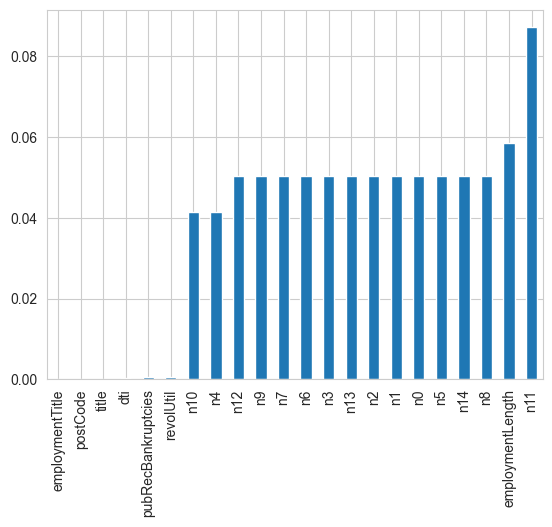

In [18]:
# 横向比较与纵向比较
# 纵向比较，如果某一个列的特征缺失值过多，那么这一列可能对于label几乎不起作用，那么可以删除
# 横向比较，一个样本数据很多列都缺失可以删除
# 树模型可以处理缺失值问题，尤其是lightGBM
missing = train_data.isnull().sum()/len(train_data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [19]:
one_value_feature = [col for col in train_data.columns if train_data[col].nunique() <= 1]
one_value_feature_test = [col for col in test_data.columns if test_data[col].nunique() <= 1]

In [20]:
# policyCode只有唯一一个值，对于label没有什么作用，可以删去
one_value_feature

['policyCode']

In [21]:
one_value_feature_test

['policyCode']

对于类别型特征，需要看数值关系是否有意义，结合业务判断
对于数值型特征，可以直接输入模型使用，但是风控人员一般会要求进行分箱，降低遍历的复杂性，减少变量噪音对于模型的影响

In [5]:
# 筛选数值型特征
numerical_feature = list(train_data.select_dtypes(exclude=['object']).columns)
# 筛选分类学特征
category_feature = list(filter(lambda x:x not in numerical_feature,list(train_data.columns)))

In [6]:
numerical_feature

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [7]:
category_feature

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [10]:
# 筛选出连续性变量
def get_numerical_serial_feature(data,features):
    numerical_serial_col = []
    numerical_no_serial_col = []
    for feature in features:
        number = data[feature].nunique()
        # 如果一个变量取值小于10个，那么可以认为是离散型的变量
        if number <= 10:
            numerical_no_serial_col.append(feature)
            continue
        numerical_serial_col.append(feature)
    return numerical_serial_col,numerical_no_serial_col
numerical_serial_feature,numerical_no_serial_feature = get_numerical_serial_feature(train_data,numerical_feature)

In [11]:
numerical_serial_feature

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [12]:
numerical_no_serial_feature

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

<Axes: >

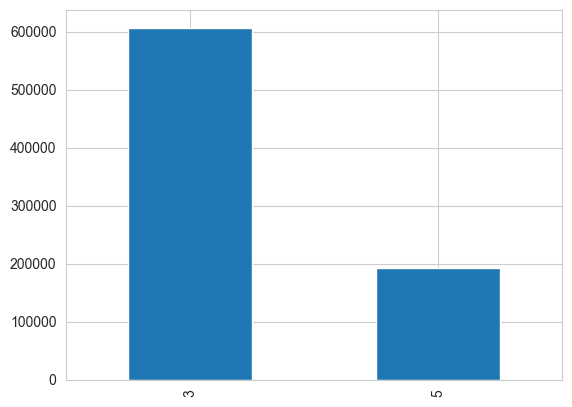

In [13]:
# 离散型变量 看个数差异决定是否保留该特征
# 有区分度，可以使用
term_data = train_data['term'].value_counts()
term_data.plot.bar()

<Axes: >

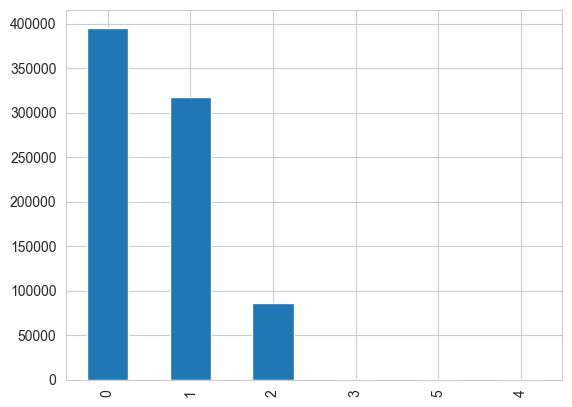

In [14]:
# 有区分度可以使用
owner_ship_data = train_data['homeOwnership'].value_counts()
owner_ship_data.plot.bar()

In [16]:
# 分布平均可以使用
verify_status_data = train_data["verificationStatus"].value_counts()
verify_status_data

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [20]:
apply_type_data = train_data['applicationType'].value_counts()
apply_type_data

0    784586
1     15414
Name: applicationType, dtype: int64

In [21]:
# 去掉
train_data['n11'].value_counts()

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [22]:
# 去掉
train_data['n12'].value_counts()

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

In [23]:
# 最终保留特征
numerical_no_serial_name = ['term','homeOwnership',"verificationStatus",'applicationType']

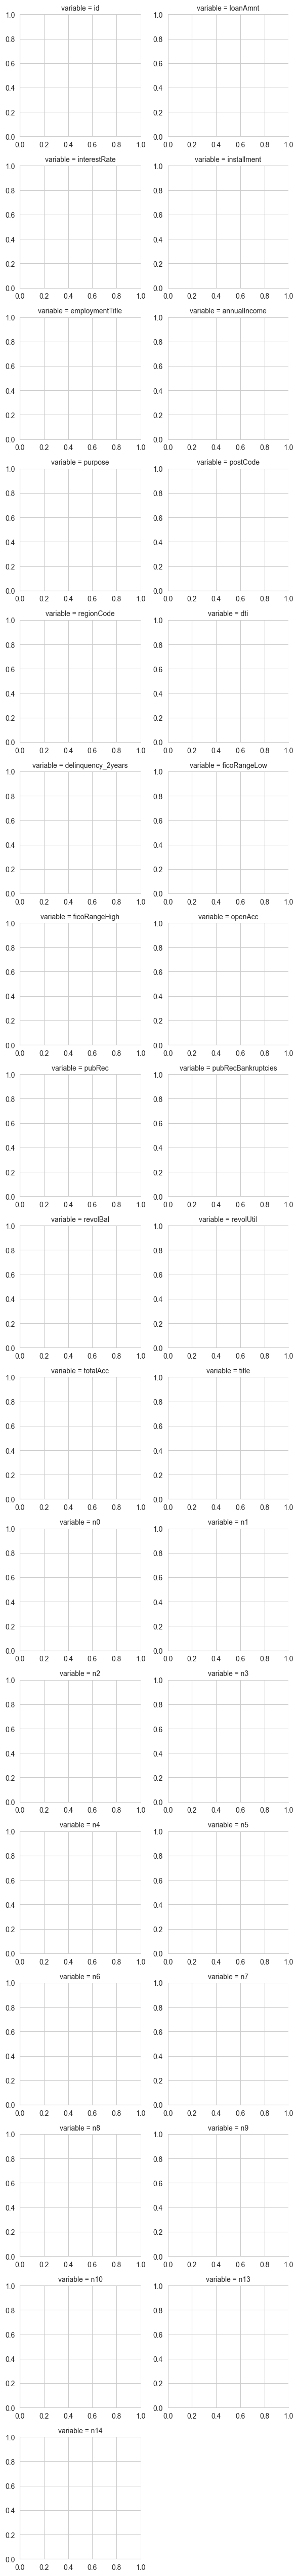

In [25]:
# 连续性变量可视化分析
f = pd.melt(train_data,value_vars=numerical_serial_feature)
g = sns.FacetGrid(f,col='variable', col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.displot,'value')

In [ ]:
# 查看某一个数值型变量的分布
plt.figure(figsize=(16,12))
plt.suptitle('Variable Distribution',fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.displot(data=train_data['loanAmnt'])
sub_plot_1.set_titles("loanAmount Distribution", fontsize=18)
sub_plot_1.set_xlabels("")
sub_plot_1.set_ylabels("Probability",fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.displot(data=np.log(train_data['loanAmnt']),fontsize=22)
sub_plot_2.set_titles("loanAmount (Log)Distribution", fontsize=18)
sub_plot_2.set_xlabels("")
sub_plot_2.set_ylabels("Probability",fontsize=15)

In [26]:
category_feature

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [27]:
train_data['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

In [28]:
train_data['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [29]:
train_data['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [30]:
train_data['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [32]:
train_data['earliesCreditLine'].value_counts()

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: earliesCreditLine, Length: 720, dtype: int64

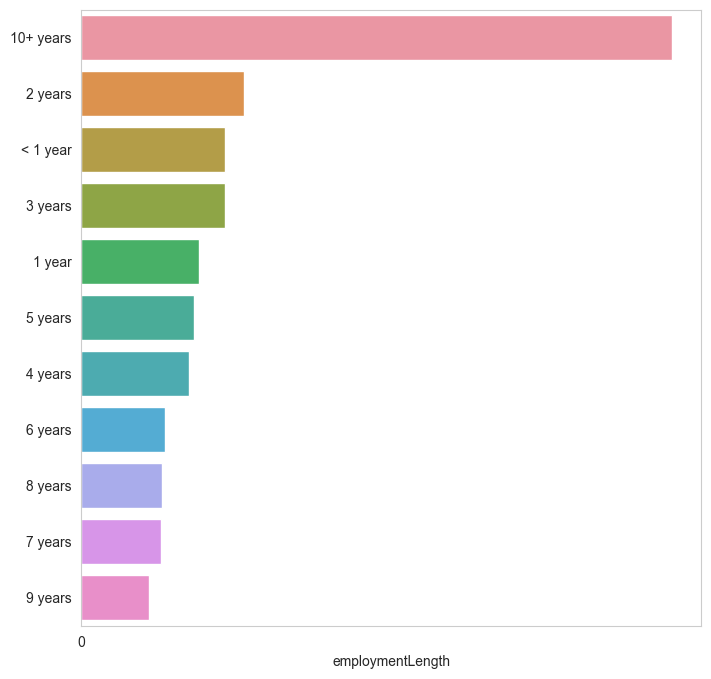

In [35]:
# 单一变量分布可视化
plt.figure(figsize=(8,8))
sns.barplot()
sns.barplot(x=train_data['employmentLength'].value_counts(dropna=False)[:20],
            y=train_data['employmentLength'].value_counts(dropna=False).keys()[:20])
plt.show()

In [36]:
# 根据标签值来可以进行可视化
train_loan_positive = train_data.loc[train_data['isDefault'] == 1]
train_loan_negative = train_data.loc[train_data['isDefault'] == 0]

In [36]:
# 查看连续性变量在不同标签值上的分布

In [42]:
# 时间格式数据查看

In [43]:
# 透视图
pivot = pd.pivot_table(train_data,index=['grade'],columns=['issueDate'],values=['loanAmnt'])
pivot

loanAmnt                                                     \
issueDate 2007-06-01   2007-07-01    2007-08-01 2007-09-01   2007-10-01   
grade                                                                     
A                NaN  4877.272727   4666.666667     9750.0  5737.500000   
B                NaN  4333.333333   4000.000000    16062.5  2341.666667   
C                NaN  9821.428571   2725.000000    10000.0  6180.000000   
D                NaN          NaN   2750.000000     2850.0  5725.000000   
E             7500.0          NaN  10000.000000        NaN  8987.500000   
F                NaN          NaN  15625.000000     2125.0          NaN   
G                NaN          NaN           NaN        NaN          NaN   

                                                                              \
issueDate 2007-11-01    2007-12-01    2008-01-01    2008-02-01    2008-03-01   
grade                                                                          
A            6395.00   6214.285714   6493.269231   6114.285714   6364.062500   
B           19150.00  11735.714286  12127.000000   9653.888889  12237.500000   
C            6568.75  12526.785714   9443.750000  10596.739130  10080.769231   
D                NaN  11198.333333  11421.666667  10716.666667  12825.000000   
E            1500.00  18875.000000  19408.333333  14000.000000  17471.875000   
F                NaN           NaN  24500.000000  13500.000000  21500.000000   
G                NaN           NaN  24625.000000           NaN           NaN   

           ...                                                          \
issueDate  ...    2018-03-01    2018-04-01    2018-05-01    2018-06-01   
grade      ...                                                           
A          ...  13725.209644  13225.337458  13810.375723  13668.161435   
B          ...  14663.565217  14918.113126  14557.899461  14525.222363   
C          ...  15882.372958  15258.951965  15536.378978  15469.864341   
D          ...  15556.718963  15206.865465  15759.054252  15197.532189   
E          ...  17021.581197  17669.041451  16886.684783  16262.673611   
F          ...  20657.211538  19748.295455  19041.875000  20156.617647   
G          ...  18700.000000  24327.500000  20438.636364  16012.500000   

                                                                   \
issueDate    2018-07-01    2018-08-01    2018-09-01    2018-10-01   
grade                                                               
A          14094.787986  13833.132530  13482.321900  13376.365188   
B          13796.538462  14128.218284  14494.362018  13571.786834   
C          14933.211144  14818.702290  14589.782016  14498.726115   
D          15561.958874  14234.794521  14829.077253  13748.868778   
E          15244.349315  12358.458647  12540.517241  13634.036145   
F          20804.687500  16314.285714  16668.421053  15753.750000   
G          16547.916667  24582.500000  10625.000000  11875.000000   

                                       
issueDate    2018-11-01    2018-12-01  
grade                                  
A          12080.829596  12545.391061  
B          14528.055556  14671.621622  
C          12755.777778  13951.863354  
D          15232.142857  14288.306452  
E          11630.921053  13600.423729  
F          12050.000000           NaN  
G          25100.000000   1000.000000  

[7 rows x 139 columns]